In [1]:
from google.colab import drive
import os
import gdown # Library to download files from Google Drive
!gdown 1764xXy5gLRuQ5zI9DGcq2PiQ6GrqDJEL # Google Drive ID of the zip file to be downloaded
!unzip -oq First Split.zip # Unzip the file downloaded. Options -o and -q overwrites the files if exists already and disables printing out the extracted files, respectively.

Downloading...
From: https://drive.google.com/uc?id=1764xXy5gLRuQ5zI9DGcq2PiQ6GrqDJEL
To: /content/First Split.zip
100% 4.09G/4.09G [00:38<00:00, 107MB/s]
unzip:  cannot find or open First, First.zip or First.ZIP.


In [2]:
!unzip "First Split.zip"


Streaming output truncated to the last 5000 lines.
  inflating: First Split/train/88. 440.0-445.0seconds_musk-to-taylor/right-channel-amplitude.png  
  inflating: First Split/train/88. 440.0-445.0seconds_musk-to-taylor/right-channel-frequency.png  
   creating: First Split/train/88. 440.0-445.0seconds_musk-to-trump/
  inflating: First Split/train/88. 440.0-445.0seconds_musk-to-trump/left-channel-amplitude.png  
  inflating: First Split/train/88. 440.0-445.0seconds_musk-to-trump/left-channel-frequency.png  
  inflating: First Split/train/88. 440.0-445.0seconds_musk-to-trump/right-channel-amplitude.png  
  inflating: First Split/train/88. 440.0-445.0seconds_musk-to-trump/right-channel-frequency.png  
   creating: First Split/train/88. 440.0-445.0seconds_obama-original/
  inflating: First Split/train/88. 440.0-445.0seconds_obama-original/left-channel-amplitude.png  
  inflating: First Split/train/88. 440.0-445.0seconds_obama-original/left-channel-frequency.png  
  inflating: First Split/t

#Necessar Libraries

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.models import resnet18
from torchvision.io import read_image



In [4]:

root_dir = '/content/First Split'




In [5]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class CustomAudioSpectrogramDataset(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        self.all_img_pairs = []
        self.labels = []

        for root, dirs, files in os.walk(main_dir):
            if "left-channel-frequency.png" in files and "right-channel-frequency.png" in files:
                left_img_path = os.path.join(root, "left-channel-frequency.png")
                right_img_path = os.path.join(root, "right-channel-frequency.png")
                self.all_img_pairs.append((left_img_path, right_img_path))
                # Assign label based on folder naming convention
                self.labels.append(0 if 'original' in root else 1)

    def __len__(self):
        return len(self.all_img_pairs)

    def __getitem__(self, idx):
        left_img_path, right_img_path = self.all_img_pairs[idx]
        left_image = read_image(left_img_path)[:3, :, :]  # Select RGB channels
        right_image = read_image(right_img_path)[:3, :, :]  # Select RGB channels

        # Stack the images along the channel dimension
        combined_image = torch.cat((left_image, right_image), 0)

        # Convert combined tensor image to float and scale to [0.0, 1.0]
        combined_image = combined_image.float() / 255.0

        # Apply transformations
        combined_image = self.transform(combined_image)

        return combined_image, self.labels[idx]

# Define transformations
transformations = transforms.Compose([
    transforms.Resize([256, 256]),  # Make sure Resize is compatible with tensor
    transforms.CenterCrop(224),
    transforms.Normalize(mean=[0.485, 0.456, 0.406, 0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225, 0.229, 0.224, 0.225])
])

# Set the root directory
root_dir = '/content/First Split'

# Create dataset instances
train_dataset = CustomAudioSpectrogramDataset(os.path.join(root_dir, 'train'), transform=transformations)
val_dataset = CustomAudioSpectrogramDataset(os.path.join(root_dir, 'validation'), transform=transformations)
test_dataset = CustomAudioSpectrogramDataset(os.path.join(root_dir, 'test'), transform=transformations)

# Define the dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=4)

# Create a dataset instance
dataset_instance = CustomAudioSpectrogramDataset(os.path.join(root_dir, 'train'), transform=transformations)

# Call __getitem__ on a specific index, e.g., 0
dataset_instance.__getitem__(0)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - P

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.0694, -2.1040, -2.0041,  ...,  0.6961,  0.1720,  1.0026],
          [-2.1168, -2.1179, -2.0797,  ...,  1.1887,  0.6857,  0.8313],
          [-2.1041, -2.0933, -1.8777,  ...,  1.8102,  2.1702,  2.1769]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-1.9961, -2.0286, -1.9499,  ..., -1.1825, -1.3743, -1.0819],
          [-2.0348, -2.0357, -2.0071,  ..., -0.6412, -0.9246, -0.9413],
          [-2.0221, -2.0105, -1.8601,  ..., -0.0788,  0.3436,  0.3184]],
 
         [[-1.7347, -1.7347, -1.7347,  ..., -1.7347, -1.7347, -1.7347],
          [-1.7347, -1.7347,

#1. Modify ResNet Model for Six-Channel Input

In [6]:

import torchvision.models as models

# Load a pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Modify the first convolution layer to accept 6-channel input
model.conv1 = torch.nn.Conv2d(6, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Modify the final fully connected layer to match the number of classes
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 2)  # Assuming two classes: 'fake' and 'original'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 108MB/s]


#2. Define Loss Function and Optimizer


In [7]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


#3. Training the Model


In [8]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Training phase
        model.train()
        train_loss = 0.0
        train_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_corrects += torch.sum(preds == labels.data)

        train_loss = train_loss / len(train_loader.dataset)
        train_acc = train_corrects.double() / len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Train the model
trained_model = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)



Epoch 0/9
----------
Train Loss: 0.1406 Acc: 0.9530
Val Loss: 0.3266 Acc: 0.9161
Epoch 1/9
----------
Train Loss: 0.0529 Acc: 0.9816
Val Loss: 0.1235 Acc: 0.9623
Epoch 2/9
----------
Train Loss: 0.0577 Acc: 0.9806
Val Loss: 0.0536 Acc: 0.9863
Epoch 3/9
----------
Train Loss: 0.0235 Acc: 0.9935
Val Loss: 0.0022 Acc: 1.0000
Epoch 4/9
----------
Train Loss: 0.0215 Acc: 0.9929
Val Loss: 0.8785 Acc: 0.6438
Epoch 5/9
----------
Train Loss: 0.0125 Acc: 0.9954
Val Loss: 0.1005 Acc: 0.9606
Epoch 6/9
----------
Train Loss: 0.0186 Acc: 0.9950
Val Loss: 0.0110 Acc: 0.9966
Epoch 7/9
----------
Train Loss: 0.0095 Acc: 0.9965
Val Loss: 0.0014 Acc: 1.0000
Epoch 8/9
----------
Train Loss: 0.0068 Acc: 0.9975
Val Loss: 0.0003 Acc: 1.0000
Epoch 9/9
----------
Train Loss: 0.0108 Acc: 0.9958
Val Loss: 0.0134 Acc: 0.9949


#Save The Model

In [9]:
import os

# Define the full path for saving the model
model_save_path = '/content/drive/MyDrive/ML Project Result/trained_model.pth'

# Ensure the directory exists
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Try saving the model, and catch any exceptions
try:
    torch.save(trained_model.state_dict(), model_save_path)
    print(f"Model successfully saved to {model_save_path}")
except Exception as e:
    print(f"Error saving the model: {e}")


Model successfully saved to /content/drive/MyDrive/ML Project Result/trained_model.pth


# Test The Model

In [10]:
def test_model(model, test_loader):
    model.eval()
    test_corrects = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)

    test_acc = test_corrects.double() / total
    print(f'Test Accuracy: {test_acc:.4f}')

# Test the model
test_model(trained_model, test_loader)


Test Accuracy: 0.9841


#Visualize the Results

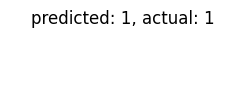

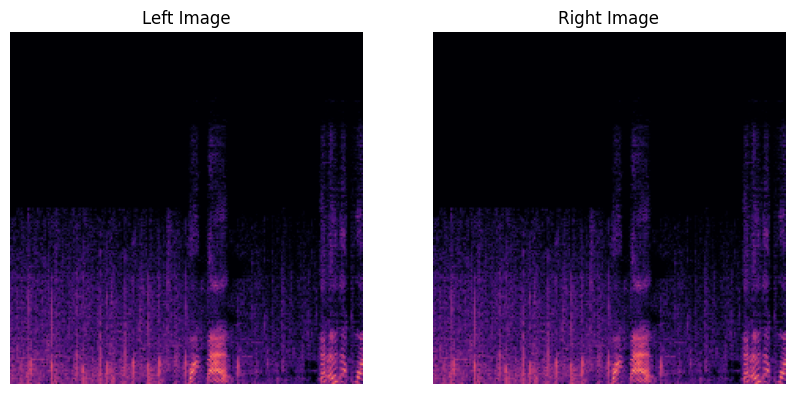

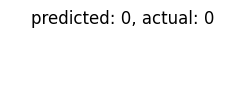

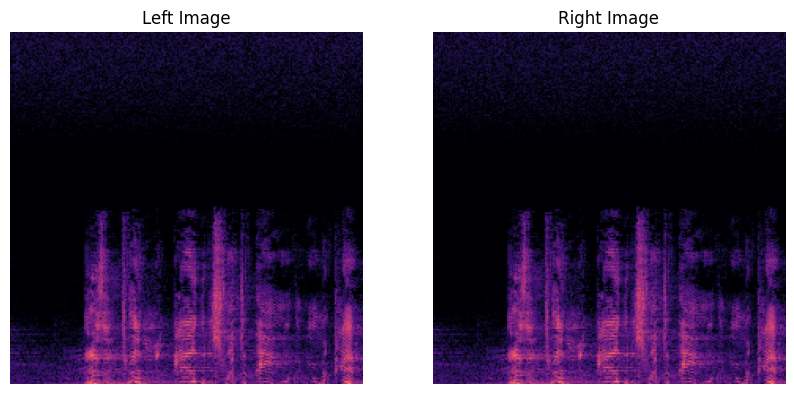

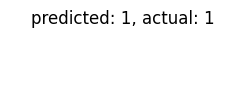

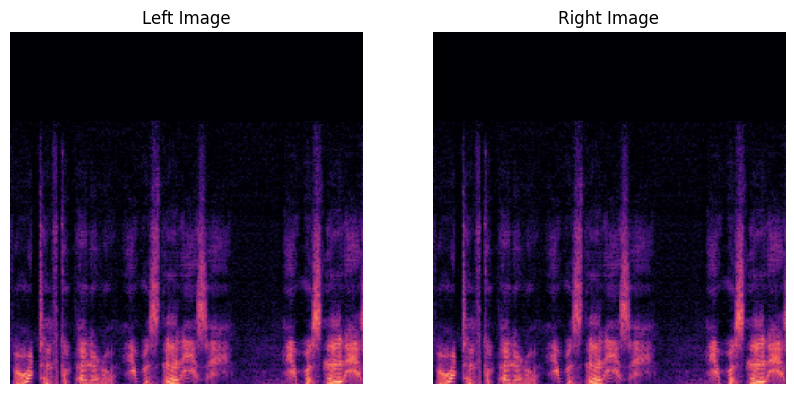

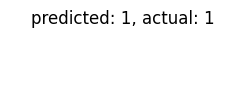

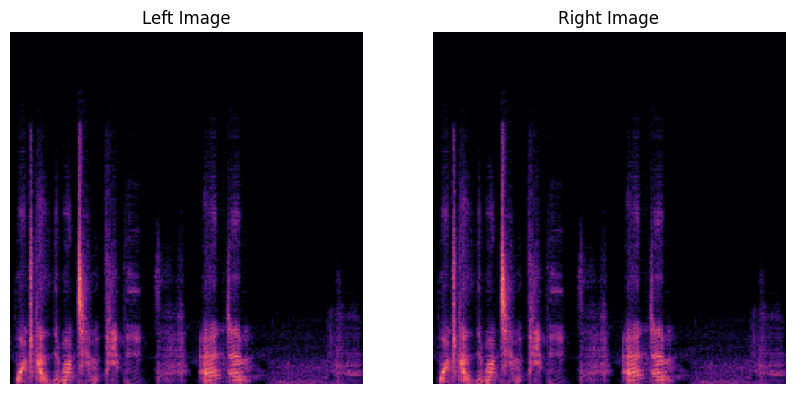

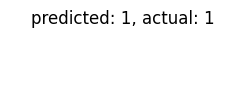

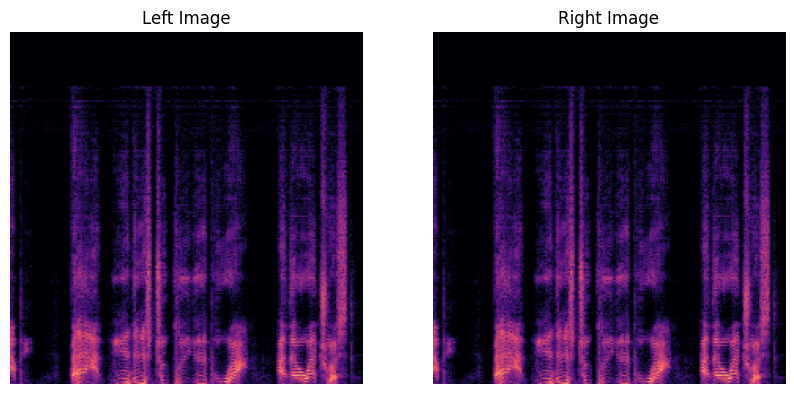

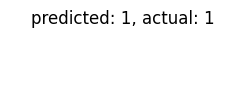

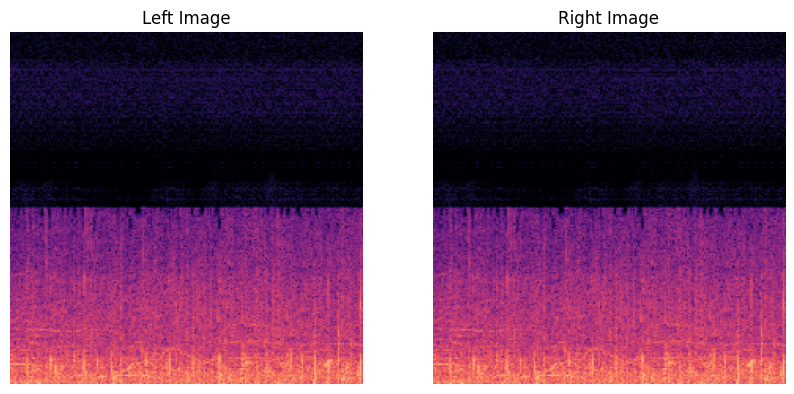

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(inp, title=None):
    """ Imshow for Tensor for six-channel images """
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Split the six-channel image into two three-channel images
    left_image = inp[:, :, :3]
    right_image = inp[:, :, 3:6]

    # Normalize each image separately
    left_image = std * left_image + mean
    right_image = std * right_image + mean

    # Clip values to be between 0 and 1
    left_image = np.clip(left_image, 0, 1)
    right_image = np.clip(right_image, 0, 1)

    # Display the images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(left_image)
    axes[0].set_title('Left Image')
    axes[0].axis('off')

    axes[1].imshow(right_image)
    axes[1].set_title('Right Image')
    axes[1].axis('off')

    if title is not None:
        plt.suptitle(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {preds[j]}, actual: {labels[j]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

visualize_model(trained_model, num_images=6)

#Confusion Matrix

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - P

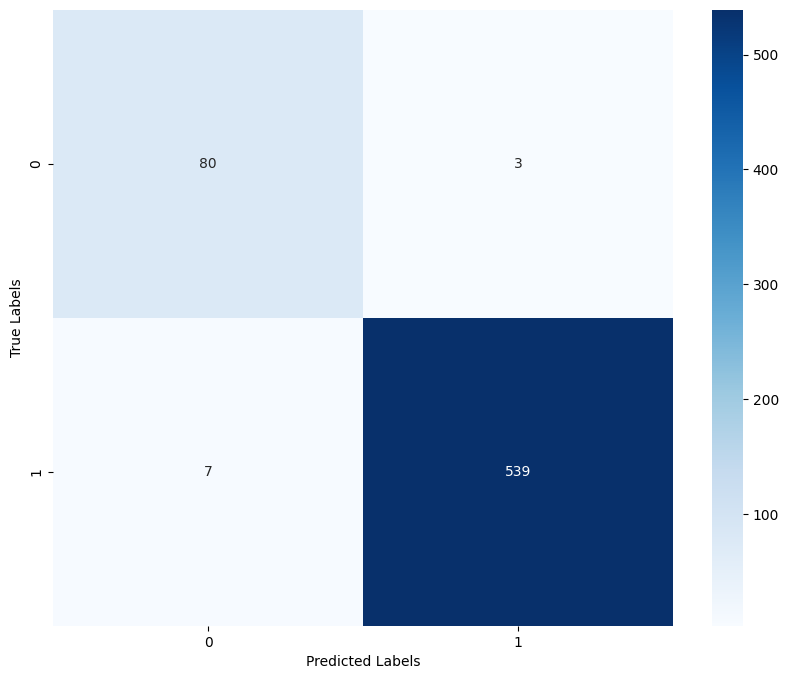

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def get_all_preds(model, loader):
    all_preds = torch.tensor([]).to(device)
    all_labels = torch.tensor([]).to(device)

    with torch.no_grad():
        for batch in loader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds = torch.cat((all_preds, preds), dim=0)
            all_labels = torch.cat((all_labels, labels), dim=0)

    return all_preds.cpu().numpy(), all_labels.cpu().numpy()

# Get predictions and labels
predictions, labels = get_all_preds(trained_model, test_loader)

# Compute the confusion matrix
conf_mat = confusion_matrix(labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
